#**Titanic ->**

# **Part-I**

In [1]:
#Importing all the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from numpy import asarray
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import pickle


In [2]:
#Loading train and test files.
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
#Taking a look into data.
print(train_df.head())
print(train_df.shape)
print('='*50)
print(test_df.head())
print(test_df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
#Details of train Data.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**We can see that**,
* The Train Data consists information of 891 Passengers, in
the form of 891 rows & 12 columns also with target column 'Survived' - survival status *( 0 'dead' / 1 'alive' )*.  
`train_df.columns` ->  
`Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],dtype='object')`
* And the Test Data of 418 passengers, with 418 rows and 11 columns.  
`test_df.columns` ->  
`Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch','Ticket', 'Fare', 'Cabin', 'Embarked'], dtype='object')`  









## **Univariate Analysis:**
for each feature/column in the given Dataset.


##Pclass
This represents a number for socio economic status of the passengers, unique values of column are,  
*1 (Upper-class), 2 (Middle-class), 3 (Lower-class).*

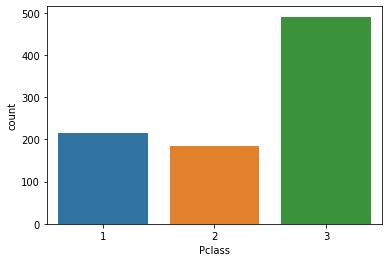

In [7]:
#Plot for distribution of each Pclass in train data.
sns.countplot(x='Pclass', data=train_df)

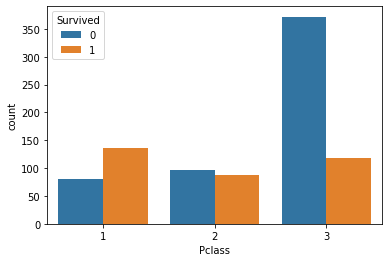

In [8]:
#Plot to check the survival rate of passenger of each Pclass.
sns.countplot(x='Pclass', hue='Survived', data=train_df)

In [9]:
Pclass1=sum(train_df['Pclass']==1)
Pclass2=sum(train_df['Pclass']==2)
Pclass3=sum(train_df['Pclass']==3)
total=819
print('The percentage of passenger in Pclass 1 ->', round(((Pclass1/total)*100)),'%')
print('The percentage of passenger in Pclass 2 ->', round(((Pclass2/total)*100)),'%')
print('The percentage of passenger in Pclass 3 ->', round(((Pclass3/total)*100)),'%')

The percentage of passenger in Pclass 1 -> 26 %
The percentage of passenger in Pclass 2 -> 22 %
The percentage of passenger in Pclass 3 -> 60 %


In [10]:
#No Null values in Pclass Data Column.
sum(train_df['Pclass'].isnull())

0

**Observations on Pclass:**
* From the analysis of Pclass on survival status, it can be clearly seen that the passengers of Pclass=3 are more likely to die in a ship wrek.
* But also the number of passenger are more in the Pclass=3 than compared to any other class.

##Name
This represents the name of each passenger on the ship.

In [11]:
#Peak into this data column.
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [12]:
#There are no null values in this column.
sum(train_df['Name'].isnull())

0

##Sex
Represents the Gender of the passenger.

In [13]:
#No Null values in Sex data column.
sum(train_df['Sex'].isnull())

0

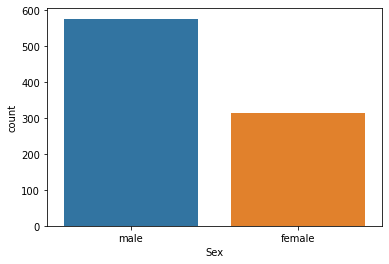

In [14]:
#Plot for the distribution of gender throughout the train data. 
sns.countplot(x='Sex', data=train_df)

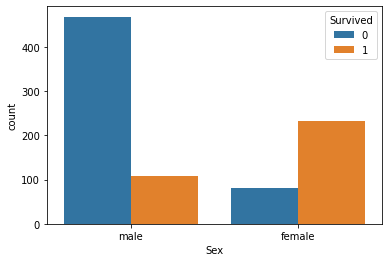

In [15]:
#Plot for the survival status of passenger gender wise.
sns.countplot(x='Sex', hue='Survived', data=train_df)

In [16]:
#Survival rate of passenger for Male & Female.
Male_1=sum(sum([(train_df['Sex']=='male') & (train_df['Survived']==1)]))
Female_1=sum(sum([(train_df['Sex']=='female') & (train_df['Survived']==1)]))
total_male=sum(train_df['Sex']=='male')
total_female=sum(train_df['Sex']=='female')

male1_rate=(Male_1/total_male)*100
female1_rate=(Female_1/total_female)*100

print('Survival rate of Male', round(male1_rate),'%')
print('Survival rate of Female', round(female1_rate),'%')

Survival rate of Male 19 %
Survival rate of Female 74 %


**Observation on Sex:**  
* It is clearly seen that survival chances of females were much greater *(74%)* as compared to men *(19%)*.
* Despite of that the number of male passengers were *577* and the female passengers were *314*.

##Age:  
This represents the age of passengers.

In [17]:
#Null values in the Age column of data.
sum(train_df['Age'].isnull())

177

In [18]:
#Mean value of Age.
mean_age=train_df['Age'].mean()
print(mean_age)

29.69911764705882


In [19]:
#Replacing all the null values with mean value of Age in the dataset.
train_df['Age'].fillna(mean_age,inplace=True)
sum(train_df['Age'].isnull()) #Now there are null values in this feature.

0

In [20]:
print('The smallest age of passenger on the ship:', train_df['Age'].min())
print('The Largets age of passenger on the ship:', train_df['Age'].max())

The smallest age of passenger on the ship: 0.42
The Largets age of passenger on the ship: 80.0


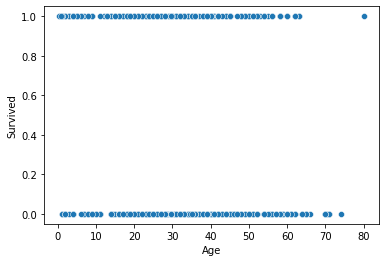

In [21]:
#Scatter plot to see if the age factor affects the survival of a passenger.
sns.scatterplot(data=train_df, x='Age', y='Survived')

Edge bin values -> [ 0.42   8.378 16.336 24.294 32.252 40.21  48.168 56.126 64.084 72.042
 80.   ]
No. of counts in each bin -> [ 54  46 177 346 118  70  45  24   9   2]


Text(0.5, 1.0, 'CDF & PDF of Age')

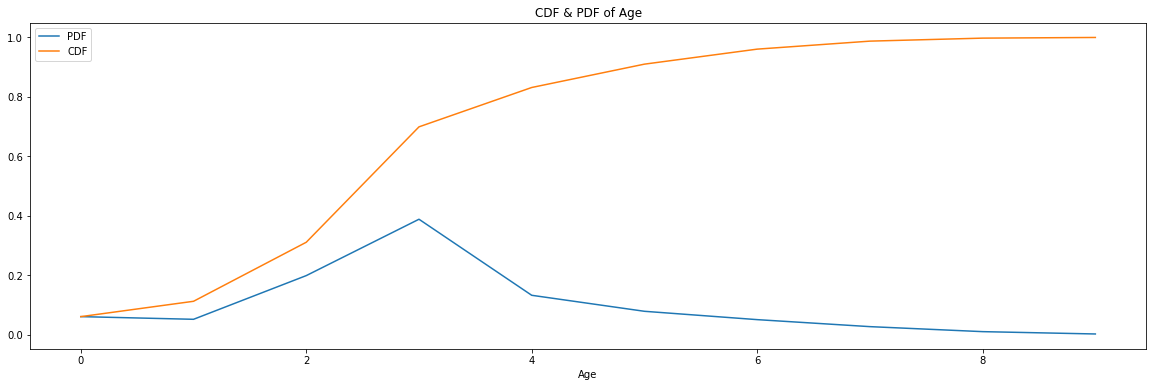

In [22]:
#PDF & CDF Plot of Age:
counts, bin_edges=np.histogram(train_df['Age'],bins=10)
print('Edge bin values ->',bin_edges)
print('No. of counts in each bin ->',counts)
plt.figure(figsize=(20,6))
pdf = counts/(sum(counts))
plt.plot(pdf,label="PDF")
cdf=np.cumsum(pdf)
plt.plot(cdf,label="CDF")
plt.legend()
plt.xlabel("Age")
plt.title("CDF & PDF of Age")

**Observations on Age:**
1. The smallest value in Age column Dataset is *0.43*, this fraction value represents the age of passenger less than *1* year old.
2. The maximum number of passengers between Age band of *16-30* years.
3. There are *177* Null values in Age column dataset, to avoid these null values we are replacing these null values with Mean Age= *29.69* .

##SibSp
This defines family relations in such a way,  
Sibling = brother, sister, step-brother, step-sister.  
Spouse= husband, wife (mistresses and fiancés were ignored).

In [23]:
#No null values.
sum(train_df['SibSp'].isnull())

0

In [24]:
#Unique values in SibSp columns.
train_df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8])

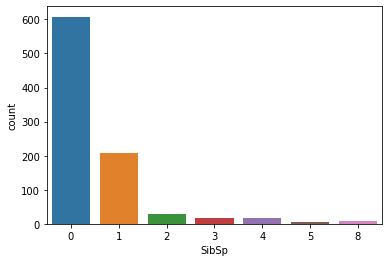

In [25]:
#Bar Plot no. of counts in SibSp.
sns.countplot(x='SibSp', data=train_df)

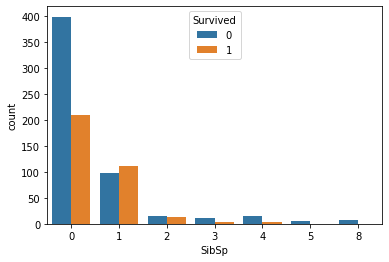

In [26]:
#Survival with unique values in SibSp.
sns.countplot(x='SibSp', hue='Survived', data=train_df)

**Observation on SibSp:**  
1. We can easily conclude that the number of passengers on the Ship are alone with No Sibling/ Spouse .
2. And value of SibSp > *4*, has no survival chances.

##Parch
The dataset defines family relations in this way,  
Parent = mother, father.  
Child = daughter, son, stepdaughter, stepson.  
Some children travelled only with a nanny, therefore parch=0 for them.

In [27]:
#No Null values inPArch Dataset
sum(train_df['Parch'].isnull())

0

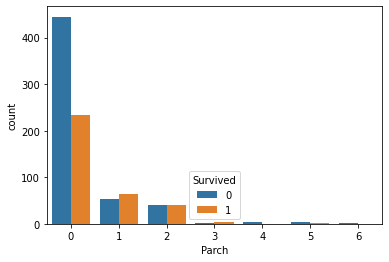

In [28]:
#Taking insights of Parch Dataset through bar plot.
sns.countplot(x='Parch', hue='Survived', data=train_df)

##Ticket 

In [29]:
#NO null values in Ticket column.
sum(train_df['Ticket'].isnull())

0

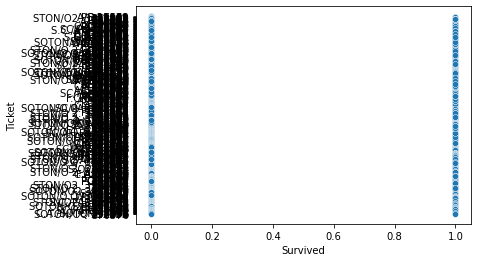

In [30]:
#Scatter plot of tickets with survival status.
sns.scatterplot(data=train_df, x='Survived', y='Ticket')

**Observation on Ticket:**  
There are no null values in Ticket Dataset, but upon analysis it can be seen that it will add no value in classification of Survival status.

##Fare
Ticket Fare for each passenger.

In [31]:
#No null values in Fare column.
sum(train_df['Fare'].isnull())

0

[732 106  31   2  11   6   0   0   0   3]
[  0.       51.23292 102.46584 153.69876 204.93168 256.1646  307.39752
 358.63044 409.86336 461.09628 512.3292 ]


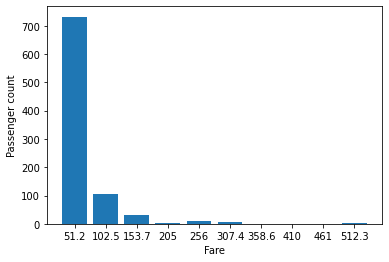

In [32]:
#Bar Plot for the number of passengers in fare bins.
counts, bin_edges=np.histogram(train_df['Fare'],bins=10)
plt.bar(['51.2','102.5','153.7','205','256','307.4','358.6','410','461','512.3'], counts)
plt.xlabel("Fare")
plt.ylabel("Passenger count")
print(counts)
print(bin_edges)

[336 179 144  57  16]
[ 0.      10.09916 20.19832 30.29748 40.39664 50.4958 ]


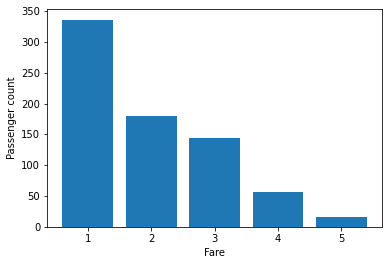

In [33]:
#As the number of passengers are very high in (0-51.2) bin as compared to other bins.
#Thus taking a closer look into first bar bin. 
Fare=train_df[train_df['Fare']<=51]
counts, bin_edges=np.histogram(Fare['Fare'],bins=5)
plt.bar(['1','2','3','4','5'], counts)
plt.xlabel("Fare")
plt.ylabel("Passenger count")
print(counts)
print(bin_edges)

**Observation on Fare:**  
1. The number of passengers with fare < *51.2*, are maximum.
2. These passengers with different fare can be further categorized into cheap, economy and premimum fare classes.

##Cabin  
It consists of the Cabin Name where the passenger in staying.

In [34]:
#Null values in Cabin column.
sum(train_df['Cabin'].isnull())

687

**Observation on Cabin:**  
1. As the *77%* of Data missing is from the Cabin column, we cannot use this further in our model as feature.
2. Because the data makes no sense in adding value for survival status model.

##Embarked  
It denotes the city/place from where the passenger has boarded the
ship.  
There are three unique values in this columns,  
*( S: Southampton, C: Cherbourg, Q:Queenstown)*.

In [35]:
#Null values in Embarked column.
sum(train_df['Embarked'].isnull())

2

In [36]:
#As there are more number of passengers embarking from S as compared to other location.
#Replacing the null value with Embark 'S'.
train_df['Embarked'].fillna('S', inplace=True)
sum(train_df['Embarked'].isnull()) #Checking if there are still any null values.

0

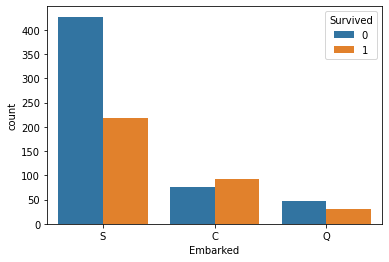

In [37]:
#Count plot for survival status of passenger boarding different locations.
sns.countplot(x='Embarked',hue='Survived', data=train_df)

In [38]:
print('Number of passengers boarded ship from location Southampton:', sum(train_df['Embarked']=='S'))
print('Number of passengers boarded ship from location Cherboug:', sum(train_df['Embarked']=='C'))
print('Number of passengers boarded ship from location Queenstown:', sum(train_df['Embarked']=='Q'))


Number of passengers boarded ship from location Southampton: 646
Number of passengers boarded ship from location Cherboug: 168
Number of passengers boarded ship from location Queenstown: 77


##**Splitting Dataset into Train, CV & Test:**

In [39]:
y = train_df['Survived'].values
x = train_df.drop(['Survived'], axis=1)
print("Shape of y - ",y.shape)
print("Shape of x - ",x.shape)

Shape of y -  (891,)
Shape of x -  (891, 11)


In [40]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [41]:
print('train ->')
print('x shape:', X_train.shape)
print('y shape:', y_train.shape)
print('*'*50)
print('cv ->')
print('x shape:', X_cv.shape)
print('y shape:', y_cv.shape)
print('*'*50)
print('test ->')
print('x shape:', X_test.shape)
print('y shape:', y_test.shape)

train ->
x shape: (569, 11)
y shape: (569,)
**************************************************
cv ->
x shape: (143, 11)
y shape: (143,)
**************************************************
test ->
x shape: (179, 11)
y shape: (179,)


## **Feature Extraction/ Engineering:**

***Function for converting 'Categorical features' to 'OneHot Encoding features'  ->***

In [42]:
def OneHot_feature(df, feature):
  encoder = OneHotEncoder(sparse=False)
  data=pd.DataFrame(df[feature])
  onehot = encoder.fit_transform(data)
  out=pd.DataFrame(onehot)
  output=out.astype(int)
  encoder.get_feature_names_out()
  output.columns=encoder.get_feature_names_out()
  return output

***OneHot features of Pclass, SibSp, Parch ->***  
1. There are no null values in these features *(Pclass/ SibSp/ Parch)*.  
2. These features are already in the form numerical value and can be used as Ordinal code, but as the feature has no purpose to be represent in the form of Ordinal code.  
3. Thus we convert these features to OneHot Encoding. 

In [43]:
#Pclass, SibSp, Parch.
train_Pclass=OneHot_feature(X_train, 'Pclass')
cv_Pclass=OneHot_feature(X_cv, 'Pclass')
test_Pclass=OneHot_feature(X_test, 'Pclass')

train_SibSp=OneHot_feature(X_train, 'SibSp')
cv_SibSp=OneHot_feature(X_cv, 'SibSp')
test_SibSp=OneHot_feature(X_test, 'SibSp')

train_Parch=OneHot_feature(X_train, 'Parch')
cv_Parch=OneHot_feature(X_cv, 'Parch')
test_Parch=OneHot_feature(X_test, 'Parch')

In [44]:
print('train_Pclass shape ->', train_Pclass.shape)
print('cv_Pclass shape ->', cv_Pclass.shape)
print('test_Pclass shape ->', test_Pclass.shape)
print()
print('train_SibSp shape ->', train_SibSp.shape)
print('cv_SibSp shape ->', cv_SibSp.shape)
print('test_SibSp shape ->', test_SibSp.shape)
print()
print('train_Parch shape ->', train_Parch.shape)
print('cv_Parch shape ->', cv_Parch.shape)
print('test_Parch shape ->', test_Parch.shape)

train_Pclass shape -> (569, 3)
cv_Pclass shape -> (143, 3)
test_Pclass shape -> (179, 3)

train_SibSp shape -> (569, 7)
cv_SibSp shape -> (143, 5)
test_SibSp shape -> (179, 7)

train_Parch shape -> (569, 6)
cv_Parch shape -> (143, 5)
test_Parch shape -> (179, 6)


In [45]:
type(train_Pclass)

pandas.core.frame.DataFrame

***Featurization on Name ->***  
1. Name feature consists of the names of passengers on the ship, there are no null values in the Name column dataset.  
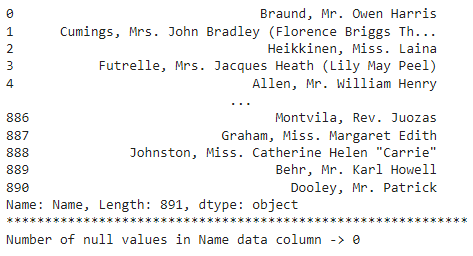
2. Now we will Extract titles from each name, and from a New feature with only four titles =['Mr', 'Mrs', 'Miss', 'Rare'], all the other titles except from    ['Mr', 'Mrs', 'Miss'] are replaced with 'Rare' as title.
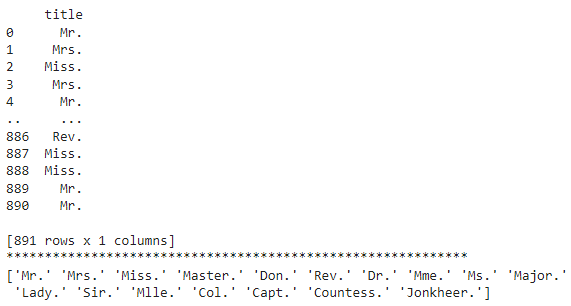

Refference - https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/

In [46]:
#Function for Extracting title from Name column.
def title_feature(df):
  name_feature=[]
  for i in range(0,len(df)):
    name=df['Name'].iloc[i]
    txt=name.split(' ')
    for i in txt:
      if len(i)>1:
        flag=False
        if i[(len(i)-1)]=='.':
          name_feature.append(i)
          flag=True
          if flag == True:
            break
  title=pd.DataFrame(name_feature)          
  title.rename(columns = {0:'title'}, inplace=True)

  unique_title=list(title['title'].unique())
  known_title=['Mlle.','Ms.','Mme.','Miss.','Mrs.','Mr.']
  for each in known_title:
    if each in unique_title:
      unique_title.remove(each)

  title['title'] = title['title'].replace(unique_title, 'Rare')
  title['title'] = title['title'].replace('Mlle.', 'Miss')
  title['title'] = title['title'].replace('Ms.', 'Miss')
  title['title'] = title['title'].replace('Mme.', 'Mrs')
  title['title'] = title['title'].replace('Miss.', 'Miss')
  title['title'] = title['title'].replace('Mrs.', 'Mrs')
  title['title'] = title['title'].replace('Mr.', 'Mr')
  return title

In [47]:
train=title_feature(X_train)
train_title=OneHot_feature(train, 'title')

cv=title_feature(X_cv)
cv_title=OneHot_feature(cv, 'title')

test=title_feature(X_test)
test_title=OneHot_feature(test, 'title')

In [48]:
print('train_title shape ->', train_title.shape)
print('cv_title shape ->', cv_title.shape)
print('test_title shape ->', test_title.shape)

train_title shape -> (569, 4)
cv_title shape -> (143, 4)
test_title shape -> (179, 4)


In [49]:
type(test_title)

pandas.core.frame.DataFrame

***Featurization on Sex ->***

In [50]:
#OneHot Encoding of Categorical 'Sex' feature.
train_Sex=OneHot_feature(X_train, 'Sex')
cv_Sex=OneHot_feature(X_cv, 'Sex')
test_Sex=OneHot_feature(X_test, 'Sex')

In [51]:
print('train_Sex shape ->', train_Sex.shape)
print('cv_Sex shape ->', cv_Sex.shape)
print('test_Sex shape ->', test_Sex.shape)

train_Sex shape -> (569, 2)
cv_Sex shape -> (143, 2)
test_Sex shape -> (179, 2)


In [52]:
type(train_Sex)

pandas.core.frame.DataFrame

***Featurization on Age ->***  
The Numerical values in Age column are converted to Categorical features using these Age Bands,  

Age Bands:  
1 -> (0-12) = Kid.  
2 -> (13-19) = Teen.  
3 -> (20-35) = Young Adult.  
4 -> (35-60) = Middle Aged Adult.  
5 -> (60 and above) = Older Aged.

In [53]:
def AgeBands(df):
  age=[]
  for i in range(0, df.shape[0]):
    Age=df['Age'].iloc[i]
    if Age>=0 and Age<13:
      age.append('kid')
    if Age>=13 and Age<=19:
      age.append('teen')
    if Age>19 and Age<=35:
      age.append('young adult')
    if Age>35 and Age<=60:
      age.append('middle aged adult')
    if Age>60:
      age.append('older aged')
  age_feature=np.reshape(age, (df.shape[0], 1))
  age_fea=pd.DataFrame(age_feature)
  return age_fea

In [54]:
train_AgeBand_feature=AgeBands(X_train)
train_Age=OneHot_feature(train_AgeBand_feature, 0)

cv_AgeBand_feature=AgeBands(X_cv)
cv_Age=OneHot_feature(cv_AgeBand_feature, 0)

test_AgeBand_feature=AgeBands(X_test)
test_Age=OneHot_feature(test_AgeBand_feature, 0)

In [55]:
print('train_Age shape ->', train_Age.shape)
print('cv_Age shape ->', cv_Age.shape)
print('test_Age shape ->', test_Age.shape)

train_Age shape -> (569, 5)
cv_Age shape -> (143, 5)
test_Age shape -> (179, 5)


In [56]:
type(train_Age)

pandas.core.frame.DataFrame

***Featurization on Fare ->***  
The numerical values of fare dataset is converted categorical features,  
with fare bands,  
* Cheap- fare < 15  
* Economy- 15 < fare < 35   
* Premium- fare > 35  

In [57]:
def fare_tags(df):
  tag=[]
  for i in range(0, df.shape[0]):
    fare=train_df['Fare'].iloc[i]
    if fare<=15:
      tag.append('Cheap')
    if fare>15 and fare<=35:
      tag.append('Economy')
    if fare>35:
      tag.append('Premium')
  fare_feature=np.reshape(tag, (df.shape[0], 1))
  fare=pd.DataFrame(tag)
  return fare

In [58]:
train_feature_fare=fare_tags(X_train)
train_fare=OneHot_feature(train_feature_fare, 0)

cv_feature_fare=fare_tags(X_cv)
cv_fare=OneHot_feature(cv_feature_fare, 0)

test_feature_fare=fare_tags(X_test)
test_fare=OneHot_feature(test_feature_fare, 0)

In [59]:
print('train_fare shape ->', train_fare.shape)
print('cv_fare shape ->', cv_fare.shape)
print('test_fare shape ->', test_fare.shape)

train_fare shape -> (569, 3)
cv_fare shape -> (143, 3)
test_fare shape -> (179, 3)


In [60]:
type(train_fare)

pandas.core.frame.DataFrame

***Featurization on Embarked ->***

In [61]:
train_Embarked=OneHot_feature(X_train, 'Embarked')
cv_Embarked=OneHot_feature(X_cv, 'Embarked')
test_Embarked=OneHot_feature(X_test, 'Embarked')

In [62]:
print('train_Embarked shape ->', train_Embarked.shape)
print('cv_Embarked shape ->', cv_Embarked.shape)
print('test_Embarked shape ->', test_Embarked.shape)

train_Embarked shape -> (569, 3)
cv_Embarked shape -> (143, 3)
test_Embarked shape -> (179, 3)


In [63]:
type(train_Embarked)

pandas.core.frame.DataFrame

***New feature - 'Chances' : Feature extraction from Pclass & Embarking ->***  
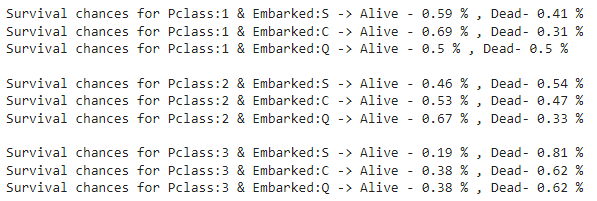  
* From above values it is clear that using Pclass & Embarking of a passenger together,  we can calculate the Survival chances of a passenger on the ship.  
* These values of survival chances has noticable difference between alive & dead, this can further be used for predicting the survival status.

In [64]:
def Chances(df, Pclass, point):
  total=len(df[(df['Pclass']==Pclass) & (df['Embarked']==point)])
  dead=len(df[(df['Pclass']==Pclass) & (df['Embarked']==point) & (df['Survived']==0)])
  alive=len(df[(df['Pclass']==Pclass) & (df['Embarked']==point) & (df['Survived']==1)])
  dead_prob=round(dead/total, 2)
  alive_prob=round(alive/total, 2)
  return dead_prob, alive_prob

D1_S=Chances(train_df, 1, 'S')[0]
A1_S=Chances(train_df, 1, 'S')[1]

D1_C=Chances(train_df, 1, 'C')[0]
A1_C=Chances(train_df, 1, 'C')[1]

D1_Q=Chances(train_df, 1, 'Q')[0]
A1_Q=Chances(train_df, 1, 'Q')[1]

D2_S=Chances(train_df, 2, 'S')[0]
A2_S=Chances(train_df, 2, 'S')[1]

D2_C=Chances(train_df, 2, 'C')[0]
A2_C=Chances(train_df, 2, 'C')[1]

D2_Q=Chances(train_df, 2, 'Q')[0]
A2_Q=Chances(train_df, 2, 'Q')[1]

D3_S=Chances(train_df, 3, 'S')[0]
A3_S=Chances(train_df, 3, 'S')[1]

D3_C=Chances(train_df, 3, 'C')[0]
A3_C=Chances(train_df, 3, 'C')[1]

D3_Q=Chances(train_df, 3, 'Q')[0]
A3_Q=Chances(train_df, 3, 'Q')[1]


In [65]:
def Get_feature(df):
  alive_feature=[]
  dead_feature=[]
  for i in range(0,df.shape[0]):
    Pclass=train_df['Pclass'].iloc[i]
    Embarked=train_df['Embarked'].iloc[i]
    if Pclass==1 and Embarked=='S':
      dead_feature.append(D1_S)
      alive_feature.append(A1_S)
    if Pclass==1 and Embarked=='C':
      dead_feature.append(D1_C)
      alive_feature.append(A1_C)
    if Pclass==1 and Embarked=='Q':
      dead_feature.append(D1_Q)
      alive_feature.append(A1_Q)
    if Pclass==2 and Embarked=='S':
      dead_feature.append(D2_S)
      alive_feature.append(A2_S)
    if Pclass==2 and Embarked=='C':
      dead_feature.append(D2_C)
      alive_feature.append(A2_C)
    if Pclass==2 and Embarked=='Q':
      dead_feature.append(D2_Q)
      alive_feature.append(A2_Q)
    if Pclass==3 and Embarked=='S':
      dead_feature.append(D3_S)
      alive_feature.append(A3_S)
    if Pclass==3 and Embarked=='C':
      dead_feature.append(D3_C)
      alive_feature.append(A3_C)
    if Pclass==3 and Embarked=='Q':
      dead_feature.append(D3_Q)
      alive_feature.append(A3_Q)
  prob_alive=np.reshape(alive_feature, (df.shape[0], 1))
  prob_dead=np.reshape(dead_feature, (df.shape[0], 1))
  
  chances_alive=pd.DataFrame(prob_alive)
  chances_dead=pd.DataFrame(prob_dead)
  chances_df=pd.concat([chances_alive, chances_dead], axis=1)
  chances_df.columns = ['alive_chances', 'dead_chances']
  return chances_df

In [66]:
train_Chances=Get_feature(X_train)
cv_Chances=Get_feature(X_cv)
test_Chances=Get_feature(X_test)

In [67]:
print('train_Chances shape ->', train_Chances.shape)
print('cv_Chances shape ->', cv_Chances.shape)
print('test_Chances shape ->', test_Chances.shape)

train_Chances shape -> (569, 2)
cv_Chances shape -> (143, 2)
test_Chances shape -> (179, 2)


In [68]:
type(train_Chances)

pandas.core.frame.DataFrame

***New Feature Extraction ->*** **' Is_Alone '**  
It represents that wether the passenger on the ship was traveling alone or with family members.  
Refference - https://www.kaggle.com/competitions/titanic/discussion

In [69]:
def Is_alone(df):
  family=df['SibSp']+df['Parch']
  alone=[]
  for each in family:
    if each>0:
      alone.append(0)
    else:
      alone.append(1)
  alone_df=pd.DataFrame(alone, columns=['alone'])
  return alone_df

In [70]:
train_alone=Is_alone(X_train)
cv_alone=Is_alone(X_cv)
test_alone=Is_alone(X_test)

In [71]:
print('train_alone shape ->', train_alone.shape)
print('cv_alone shape ->', cv_alone.shape)
print('test_alone shape ->', test_alone.shape)

train_alone shape -> (569, 1)
cv_alone shape -> (143, 1)
test_alone shape -> (179, 1)


In [72]:
type(train_alone)

pandas.core.frame.DataFrame

***New Feature Extraction ->*** **' family_size '**  
This represents the size of family, of a passenger onboard the ship.

In [73]:
def family_size(df):
  family_size=[]
  for i in range(0, df.shape[0]):
    SibSp=train_df['SibSp'][i]
    Parch=train_df['Parch'][i]
    size=SibSp+Parch+1
    family_size.append(size)
    family_size_df=pd.DataFrame(family_size, columns=['family_size'])
  return family_size_df

In [74]:
train_family_size=family_size(X_train)
cv_family_size=family_size(X_cv)
test_family_size=family_size(X_test)

In [75]:
print('train_family_size shape ->', train_family_size.shape)
print('cv_family_size shape ->', cv_family_size.shape)
print('test_family_size shape ->', test_family_size.shape)

train_family_size shape -> (569, 1)
cv_family_size shape -> (143, 1)
test_family_size shape -> (179, 1)


## **Concating All the Features:**

In [76]:
train_features=pd.concat([train_Pclass, train_title, train_Sex, train_Age, train_SibSp,train_Parch, train_fare, train_Embarked, train_Chances, train_alone, train_family_size], axis=1)
cv_features=pd.concat([cv_Pclass, cv_title, cv_Sex, cv_Age, cv_SibSp,cv_Parch, cv_fare, cv_Embarked, cv_Chances, cv_alone, cv_family_size], axis=1)
test_features=pd.concat([test_Pclass, test_title, test_Sex, test_Age, test_SibSp,test_Parch, test_fare, test_Embarked, test_Chances, test_alone, test_family_size], axis=1)

In [77]:
#Ordering features in DataFrame.
def ordering_df(df):
  df=df[['Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Miss', 'title_Mr', 'title_Mrs', 'title_Rare', 'Sex_female', 'Sex_male', 'x0_kid', 'x0_middle aged adult', 'x0_older aged', 'x0_teen', 'x0_young adult', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Parch_9', 'x0_Cheap', 'x0_Economy', 'x0_Premium', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'alive_chances', 'dead_chances', 'alone', 'family_size']]
  return df

#Padding of absent features.
def feature_padding(df):
  feature_list=list(df.columns)
  feature_names=['Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Miss', 'title_Mr',
           'title_Mrs', 'title_Rare', 'Sex_female', 'Sex_male', 'x0_kid',
           'x0_middle aged adult', 'x0_older aged', 'x0_teen', 'x0_young adult',
           'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
           'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
           'Parch_5', 'Parch_6', 'Parch_9', 'x0_Cheap', 'x0_Economy', 'x0_Premium',
           'Embarked_C', 'Embarked_Q', 'Embarked_S', 'alive_chances',
           'dead_chances', 'alone', 'family_size']
  feature=[]
  for each in feature_list:
    if each in feature_names:
      feature.append(each)
  for i in feature:
    if i in feature_names:
      feature_names.remove(i)
  padding=[]
  for i in range(0,len(feature_names)):
    zeros=list([0]*(df.shape[0]))
    padding.append(zeros)
  zero_padding=np.reshape(padding, (df.shape[0], len(feature_names)))
  padding_df=pd.DataFrame(zero_padding, columns=feature_names)
  out=pd.concat([df, padding_df], axis=1)
  output=ordering_df(out)
  return output

In [78]:
train_feature=feature_padding(train_features)
cv_feature=feature_padding(cv_features)
test_feature=feature_padding(test_features)

In [79]:
print('List of features ->', train_feature.columns)
print('*'*80)
print('train_features shape ->', train_feature.shape)
print('cv_features shape ->', cv_feature.shape)
print('test_features shape ->', test_feature.shape)

List of features -> Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'Sex_female', 'Sex_male', 'x0_kid',
       'x0_middle aged adult', 'x0_older aged', 'x0_teen', 'x0_young adult',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'x0_Cheap', 'x0_Economy', 'x0_Premium',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'alive_chances',
       'dead_chances', 'alone', 'family_size'],
      dtype='object')
********************************************************************************
train_features shape -> (569, 39)
cv_features shape -> (143, 39)
test_features shape -> (179, 39)


In [80]:
train_feature.to_csv('train_feature.csv', index=False)
cv_feature.to_csv('cv_feature.csv', index=False)
test_feature.to_csv('test_feature.csv', index=False)

In [81]:
train_feature=pd.read_csv('train_feature.csv')
cv_feature=pd.read_csv('cv_feature.csv')
test_feature=pd.read_csv('test_feature.csv')

## **ML Models ->**

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

In [83]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [84]:
#Random Model:
predicted_y = np.zeros((len(test_feature),1))
for i in range(len(test_feature)):
  rand_probs = np.random.randint(low=2, size=1)
  predicted_y[i] = rand_probs
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y))
print("Accuracy on Test Data using Random Model",accuracy_score(y_test, predicted_y))

Log loss on Test Data using Random Model 19.29567382869765
Accuracy on Test Data using Random Model 0.441340782122905


For values of alpha =  1e-05 The log loss is: 0.5368005694288753
For values of alpha =  0.0001 The log loss is: 0.5449477806434133
For values of alpha =  0.001 The log loss is: 0.5104238239213136
For values of alpha =  0.01 The log loss is: 0.5225239013517937
For values of alpha =  0.1 The log loss is: 0.5224663238065522
For values of alpha =  1 The log loss is: 0.5524738856839815
For values of alpha =  10 The log loss is: 0.6123066333567421


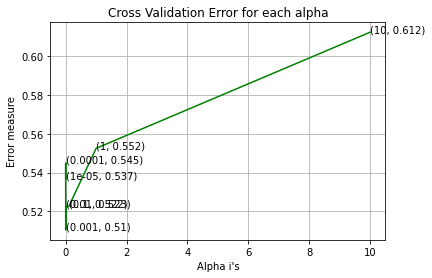

For values of best alpha =  0.001 The train log loss is: 0.3939326000247065
For values of best alpha =  0.001 The test log loss is: 0.46994993284752085
Total number of data points : 179


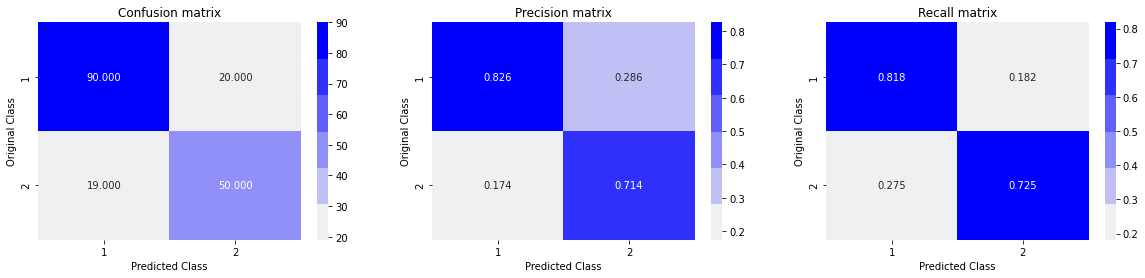

Accuracy on Test Data using Logistic Regression Model 0.7821229050279329


In [85]:
#Logistic Regression Model:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_feature, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_feature, y_train)
    predict_y = sig_clf.predict_proba(cv_feature)
    log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_feature, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_feature, y_train)

predict_y = sig_clf.predict_proba(train_feature)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_feature)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("Accuracy on Test Data using Logistic Regression Model",accuracy_score(y_test, predicted_y))

For values of alpha =  1e-05 The log loss is: 0.5423737668307234
For values of alpha =  0.0001 The log loss is: 0.5488249954259549
For values of alpha =  0.001 The log loss is: 0.5146872094406495
For values of alpha =  0.01 The log loss is: 0.5078786473191169
For values of alpha =  0.1 The log loss is: 0.5074381391299564
For values of alpha =  1 The log loss is: 0.6662822935471804
For values of alpha =  10 The log loss is: 0.6662822935690822


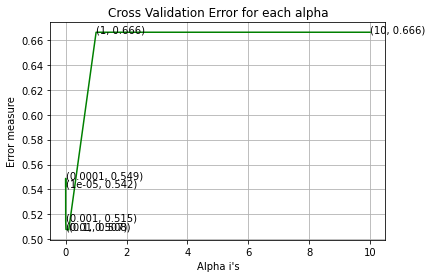

For values of best alpha =  0.1 The train log loss is: 0.5015871415756543
For values of best alpha =  0.1 The test log loss is: 0.5172258476515429
Total number of data points : 179


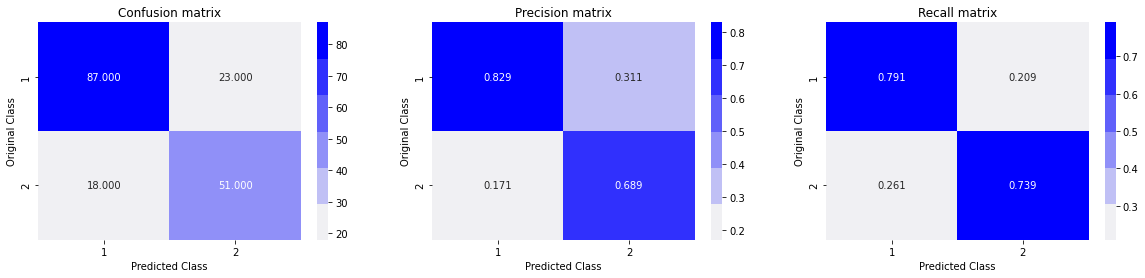

Accuracy on Test Data using Linear SVM Model 0.770949720670391


In [86]:
#Linear SVM Model:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(train_feature, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_feature, y_train)
    predict_y = sig_clf.predict_proba(cv_feature)
    log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(train_feature, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_feature, y_train)

predict_y = sig_clf.predict_proba(train_feature)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_feature)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("Accuracy on Test Data using Linear SVM Model",accuracy_score(y_test, predicted_y))

for n_estimators = 100 and max depth =  5
Log Loss : 0.4801045065782123
for n_estimators = 100 and max depth =  10
Log Loss : 0.5035935917928003
for n_estimators = 200 and max depth =  5
Log Loss : 0.47502776281902587
for n_estimators = 200 and max depth =  10
Log Loss : 0.498715249420223
for n_estimators = 500 and max depth =  5
Log Loss : 0.47419755000094954
for n_estimators = 500 and max depth =  10
Log Loss : 0.4988442765639539
for n_estimators = 1000 and max depth =  5
Log Loss : 0.47428784324128587
for n_estimators = 1000 and max depth =  10
Log Loss : 0.49763937413804277
for n_estimators = 2000 and max depth =  5
Log Loss : 0.47481216733958553
for n_estimators = 2000 and max depth =  10
Log Loss : 0.4982889497868276
For values of best estimator =  500 The train log loss is: 0.36745440740765317
For values of best estimator =  500 The cross validation log loss is: 0.47419755000094954
For values of best estimator =  500 The test log loss is: 6.753472438969931


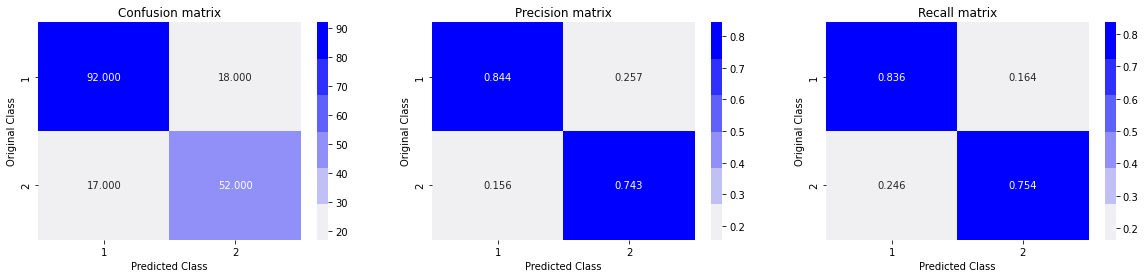

Accuracy on Test Data using Random Forest Model 0.8044692737430168


In [87]:
#Random Forest:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_feature, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_feature, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_feature)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_feature, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_feature, y_train)

predict_y = sig_clf.predict_proba(train_feature)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_feature)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict(test_feature)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
plot_confusion_matrix(y_test, predict_y)
print("Accuracy on Test Data using Random Forest Model",accuracy_score(y_test, predict_y))

[0]	train-logloss:0.682865	valid-logloss:0.683569
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.599556	valid-logloss:0.608268
[20]	train-logloss:0.540676	valid-logloss:0.555515
[30]	train-logloss:0.497368	valid-logloss:0.517761
[40]	train-logloss:0.464879	valid-logloss:0.490784
[50]	train-logloss:0.438772	valid-logloss:0.470309
[60]	train-logloss:0.418363	valid-logloss:0.455376
[70]	train-logloss:0.402523	valid-logloss:0.445634
[80]	train-logloss:0.390215	valid-logloss:0.438142
[90]	train-logloss:0.380335	valid-logloss:0.433296
[100]	train-logloss:0.371941	valid-logloss:0.42972
[110]	train-logloss:0.364638	valid-logloss:0.427423
[120]	train-logloss:0.358398	valid-logloss:0.426815
[130]	train-logloss:0.353425	valid-logloss:0.427643
Stopping. Best iteration:
[118]	train-logloss:0.359554	valid-logloss:0.426641

The test log loss is: 0.42806896407094747
Total number

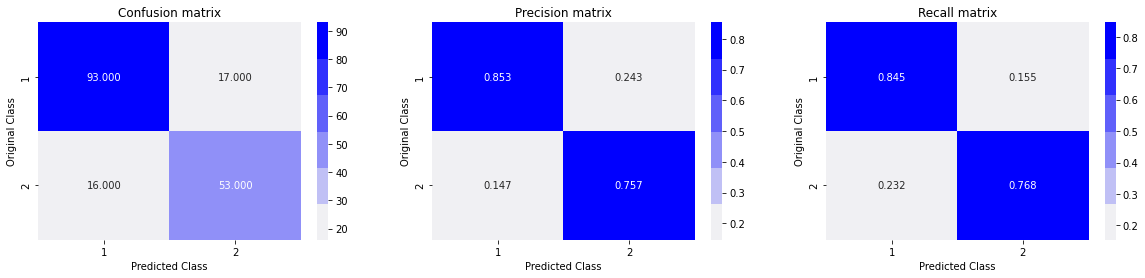

Accuracy on Test Data using XgBoost Model 0.8156424581005587


In [88]:
#XG Boost Model:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(train_feature, label=y_train)
d_test = xgb.DMatrix(test_feature, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(train_feature,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)
print("Accuracy on Test Data using XgBoost Model",accuracy_score(y_test, predicted_y))

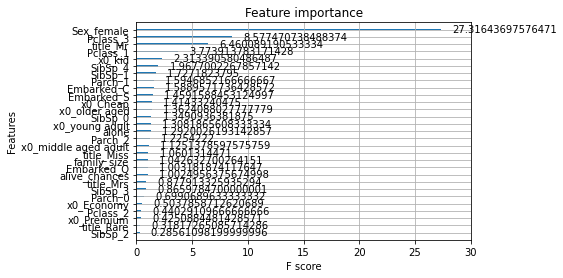

{'Embarked_C': 1.5889571736428572,
 'Embarked_Q': 1.003181874117647,
 'Embarked_S': 1.4591588453124997,
 'Parch_0': 0.6990689633333332,
 'Parch_1': 1.5946852166666667,
 'Parch_2': 1.2254222,
 'Pclass_1': 3.773913783171428,
 'Pclass_2': 0.44029109666666666,
 'Pclass_3': 8.577470738488374,
 'Sex_female': 27.31643697576471,
 'SibSp_0': 1.3490936381875,
 'SibSp_1': 1.7271823795,
 'SibSp_2': 0.28561098199999996,
 'SibSp_3': 0.8659784700000001,
 'SibSp_4': 1.9677002267857142,
 'alive_chances': 1.0024956375674998,
 'alone': 1.2920026193142857,
 'family_size': 1.042632700264151,
 'title_Miss': 1.0601314471,
 'title_Mr': 6.460089190533334,
 'title_Mrs': 0.877913325935294,
 'title_Rare': 0.31817265085714286,
 'x0_Cheap': 1.41433240475,
 'x0_Economy': 0.5037858712620689,
 'x0_Premium': 0.4250884481428571,
 'x0_kid': 2.313390580486487,
 'x0_middle aged adult': 1.1251378597575759,
 'x0_older aged': 1.3624088027777779,
 'x0_young adult': 1.3081865608333334}

In [89]:
import matplotlib.pyplot as plt
from xgboost import plot_importance, XGBClassifier
#https://stackoverflow.com/questions/37627923/how-to-get-feature-importance-in-xgboost

model = XGBClassifier()
model.fit(train_feature,y_train)
plot_importance(model, importance_type = 'gain') # other options available
plt.show()
model.get_booster().get_score(importance_type = 'gain')

## ***gender_submission.csv for Kaggle Competition ->***

In [90]:
def final_feature(df):

#Pclass, SibSp, Parch
  df_Pclass=OneHot_feature(df, 'Pclass')
  df_SibSp=OneHot_feature(df, 'SibSp')
  df_Parch=OneHot_feature(df, 'Parch')
#title
  Name=title_feature(df)
  df_title=OneHot_feature(Name, 'title')
#Sex
  df_Sex=OneHot_feature(df, 'Sex')
#Age
  mean_age=29.69911764705882
  df['Age'].fillna(mean_age,inplace=True)
  df_AgeBand_feature=AgeBands(df)
  df_Age=OneHot_feature(df_AgeBand_feature, 0)
#fare
  avg_fare=25
  df['Fare'].fillna(avg_fare, inplace=True)
  df_feature_fare=fare_tags(df)
  df_fare=OneHot_feature(df_feature_fare, 0)
#Embarked
  df['Embarked'].fillna('S', inplace=True)
  df_Embarked=OneHot_feature(df, 'Embarked')
#Chances
  df_Chances=Get_feature(df)
#IS_alone
  df_alone=Is_alone(df)
#family_size
  df_family_size=family_size(df)
#concating
  df_features=pd.concat([df_Pclass, df_title, df_Sex, df_Age, df_SibSp, df_Parch, df_fare,df_Embarked, df_Chances, df_alone, df_family_size], axis=1)
#padding_features
  df_feature=feature_padding(df_features)
  print(df_feature.shape)
  print(df_feature.columns)

  return df_feature

In [91]:
train_y=train_df['Survived']
train_x=final_feature(train_df)

print(train_x)
print(train_y.shape)

(891, 39)
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'Sex_female', 'Sex_male', 'x0_kid',
       'x0_middle aged adult', 'x0_older aged', 'x0_teen', 'x0_young adult',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'x0_Cheap', 'x0_Economy', 'x0_Premium',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'alive_chances',
       'dead_chances', 'alone', 'family_size'],
      dtype='object')
     Pclass_1  Pclass_2  Pclass_3  title_Miss  title_Mr  title_Mrs  \
0           0         0         1           0         1          0   
1           1         0         0           0         0          1   
2           0         0         1           1         0          0   
3           1         0         0           0         0          1   
4           0         0         1           0         1       

In [92]:
test_x=final_feature(test_df)

test_x

(418, 39)
Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_Rare', 'Sex_female', 'Sex_male', 'x0_kid',
       'x0_middle aged adult', 'x0_older aged', 'x0_teen', 'x0_young adult',
       'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5',
       'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4',
       'Parch_5', 'Parch_6', 'Parch_9', 'x0_Cheap', 'x0_Economy', 'x0_Premium',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'alive_chances',
       'dead_chances', 'alone', 'family_size'],
      dtype='object')


,Pclass_1,Pclass_2,Pclass_3,title_Miss,title_Mr,title_Mrs,title_Rare,Sex_female,Sex_male,x0_kid,...,x0_Cheap,x0_Economy,x0_Premium,Embarked_C,Embarked_Q,Embarked_S,alive_chances,dead_chances,alone,family_size
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0.19,0.81,1,2
1,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0.69,0.31,0,2
2,0,1,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0.19,0.81,1,1
3,0,0,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0.59,0.41,1,2
4,0,0,1,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0.19,0.81,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0.46,0.54,1,1
414,1,0,0,0,0,0,1,1,0,0,...,1,0,0,1,0,0,0.19,0.81,1,1
415,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0.19,0.81,1,1
416,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0.46,0.54,1,3


In [93]:
#Random Forest Best Parameters
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=5, random_state=42, n_jobs=-1)
clf.fit(train_x, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x, train_y)
#saving best model
filename = 'finalized_model.sav'
pickle.dump(sig_clf, open(filename, 'wb'))
#predicting using the best model
predict_y = sig_clf.predict(test_x)

In [94]:
submission=pd.DataFrame(predict_y, columns=['Survived'])
id=[]
for i in range(892, 892+submission.shape[0]):
  id.append(i)
PassengerId=pd.DataFrame(id, columns=['PassengerId'])
gender_submission=pd.concat([PassengerId, submission], axis=1)

In [95]:
gender_submission.to_csv('gender_submission.csv', index=False)

## **--> Obtained a Leaderboard score of *0.77511***

# **Part-II**

* Here we will to try dive deep into female passengers data in-order to be able to predict their survival status more accurately to increase the previous accuracy.  
* We try a method determined as WCG Method in the refference link below, to predict the survival status of womans & boys(not man) passengers that belong to a group of passengers boarded the ship.  
* In this method we will assign a smiliar Group_id to all the passenger that are from the same family(i.e. have similar surnames) or are relatives and boarded ship together as group and depending on the number of survived member of each group we will obtain survival_chances for each passenger that will help us to predict the Survival status of those passengers.
* And the rest of passengers(i.e. passengers with title-'man' or passengers that dosent belong to any Group) we will predict their survival status(0/1) using our previous best model, on top of this method.  

refference links -   
1. https://www.kaggle.com/code/mviola/titanic-wcg-knns-ensemble-0-82775-top-1/notebook  
2. https://www.kaggle.com/competitions/titanic/discussion/57447


In [96]:
#combining train & test data.
df = pd.concat([train_df, test_df]).reset_index().drop(['index'], axis=1)

In [97]:
# Creating a new feature column consisting the surname of each respective passenger
df['Surname'] = df['Name'].apply(lambda x: x.split(',')[0])

In [98]:
# We are introducing a new column
# This column  consists of combined features of Pclass, Ticket, Fare & Embarked
df['Combined_features'] = 'new_col'
# Initialize Ticket_id = Pclass + Ticket + Fare + Embarked
def Combined_features(row):
    row['Combined_features'] = str(row.Pclass) + '-' + str(row.Ticket)[:-1] + '-' + str(row.Fare) + '-' + str(row.Embarked)
    return row

df = df.apply(Combined_features, axis='columns')

In [99]:
# New Group_id column merging the combined features and surnames of each passenger
# In order to create a Group id representing the passengers
df['Group_id'] = 'new_col2'
# Initialize Group_id = Surname + Ticket_id
def group_id(row):
    row['Group_id'] = str(row.Surname) + '-' + str(row.Combined_features)
    return row

df = df.apply(group_id, axis='columns')

In [100]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Surname',
       'Combined_features', 'Group_id'],
      dtype='object')

In [101]:
# New feature that classifies each passenger as man, woman or boy
df['Title'] = 'man'
df.loc[df.Sex == 'female', 'Title'] = 'woman'
df.loc[df['Name'].str.contains('Master'), 'Title'] = 'boy'

In [102]:
'''
 In order to increase the previous accuracy obtained, we trying create new features which would be able to classify the, 
 survival status of woman & boy more accurately.
'''
# So we assign noGroup to every man in our Data set.
df.loc[df.Title == 'man', 'Group_id'] = 'noGroup'
# We create a new feature UG_count(Unique Group counts) this will take counts of each  unique group.
# If the UG_count of any passenger is 1 i.e. he/she dosent belong to any group, so we will assign that passenger with noGroup.
# And all the passengers with UG_count>1 will contain there unique GroupId.
df['UG_count'] = df.loc[df.Title != 'man'].groupby('Group_id')['Group_id'].transform('count')
# assign noGroup to every unique value
df.loc[df.UG_count <=1, 'Group_id'] = 'noGroup'

In [103]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Combined_features,Group_id,Title,UG_count
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,3-A/5 2117-7.25-S,noGroup,man,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1-PC 1759-71.2833-C,noGroup,woman,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,3-STON/O2. 310128-7.925-S,noGroup,woman,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,1-11380-53.1-S,noGroup,woman,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,3-37345-8.05-S,noGroup,man,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S,Spector,3-A.5. 323-8.05-S,noGroup,man,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,1-PC 1775-108.9-C,noGroup,woman,1.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,3-SOTON/O.Q. 310126-7.25-S,noGroup,man,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,S,Ware,3-35930-8.05-S,noGroup,man,NaN


In [104]:
cols = ['PassengerId', 'Survived', 'Name', 'Title', 'Combined_features','Group_id']
df.loc[(df.Combined_features == '1-1696-134.5-C') & (df.Title != 'man'), cols]
#Upon observation of data we can see that, the passengers with different surnames have the same Combined_features,
#But have different Group_ids this denotes that these passenger maybe relatives !

#Adding such passenger to existing Group_ids.
indices = []
for i in range(0,1309):
    if (df.loc[i,'Title'] != 'man') & (df.loc[i,'Group_id'] == 'noGroup'):
        df.loc[i,'Group_id'] = df.loc[(df['Combined_features'] == df.loc[i, 'Combined_features']) & (df.Title != 'man'), 'Group_id'].iloc[0]
        if (df.loc[i, 'Group_id'] != 'noGroup'):
            indices.append(i)

print('All passengers with these Passenger_Id are now added to existing Group_ids ->', indices)

All passengers with these Passenger_Id are now added to existing Group_ids -> [337, 708, 950, 1032, 1067, 1140, 1171, 1258, 1262, 1266, 1291]


In [105]:
'''
Creating a new column that consists the survival chances of the passengers that is not a man (as we are trying to only 
predict for woman & boy) & are in a group with which has UG_Count>1 i.e. passenger(woman or boy) is not alone, and 
determining the survival_chances(0 to 1) of that passenger, by calculating the mean of 'Survived' of all the passengers 
in the same group.
''' 
df['Survival_chances'] = df.loc[(df.Title != 'man') & (df.Group_id != 'noGroup')].groupby('Group_id').Survived.transform('mean')

In [106]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Surname,Combined_features,Group_id,Title,UG_count,Survival_chances
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,3-A/5 2117-7.25-S,noGroup,man,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,1-PC 1759-71.2833-C,noGroup,woman,1.0,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,3-STON/O2. 310128-7.925-S,noGroup,woman,1.0,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,1-11380-53.1-S,noGroup,woman,1.0,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,3-37345-8.05-S,noGroup,man,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S,Spector,3-A.5. 323-8.05-S,noGroup,man,NaN,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,1-PC 1775-108.9-C,noGroup,woman,1.0,NaN
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,3-SOTON/O.Q. 310126-7.25-S,noGroup,man,NaN,NaN
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,S,Ware,3-35930-8.05-S,noGroup,man,NaN,NaN


In [107]:
#From this study we get predicted chances for woman and boy, that are in a group.
predicted_chances=df[['PassengerId','Survival_chances']][891:1309]

In [108]:
print(sum(predicted_chances['Survival_chances']==0))
print(sum(predicted_chances['Survival_chances']==1))
print(sum(predicted_chances['Survival_chances'].isnull()))
print(sum(predicted_chances['Survival_chances']==0.5))
print(sum(predicted_chances['Survival_chances']==0.75))

17
45
353
1
2


In [109]:
#These are the predictions of the previous best Model.
model_predictions=pd.read_csv('gender_submission.csv')

In [110]:
#Here we merge both outputs on PassengerId of Part-I(best Model) & Part-II(Analysis on woman and boy in groups).
Merged = pd.merge(model_predictions, predicted_chances, on='PassengerId')

In [111]:
'''
Now we are replacing the survival_chances>0.5 with 1 and survival_chances<0.5 with 0.
And replacing all other Nan with 0.5 as to denote that the man and passengers with noGroup have 50/50 survival_chances
according to this method, and these passengers survival status(0/1) will be declared by using Part-I(best_Model).
'''

Merged['Survival_chances']=Merged['Survival_chances'].fillna(0.5)

chances_col = Merged['Survival_chances']
chances_col.replace(to_replace = 0.75, value = 1, inplace=True)
#Combining the recquired survival status from the Part-I & Part-II as discussed. 
survival_status=[]
PassengerId=[]
for i in range(0,418):
  id = Merged['PassengerId'][i]
  chances = Merged['Survival_chances'][i]
  model = Merged['Survived'][i]
  if chances == 0.5:
    survival_status.append(int(model))
  else:
    survival_status.append(int(chances))
  PassengerId.append(int(id))

In [112]:
#Preparing final Kaggle submission dataframe.
data_tuples = list(zip(PassengerId, survival_status))
final_df = pd.DataFrame(data_tuples,columns=['PassengerId', 'Survived'])

#Saving the obtained dataframe to .csv file.
final_df.to_csv('kaggle_submission (1).csv', index = False, encoding='utf-8')

## **--> Obtained a improved Leaderboard score of *0.80143***  

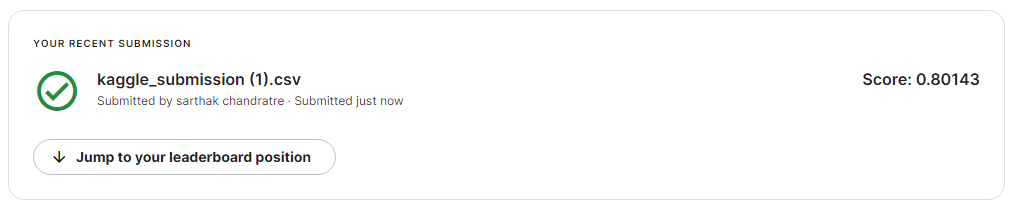